<a href="https://colab.research.google.com/github/ValentinoFernandez/Aplicacion-SIS310/blob/main/Lab_2_reg_pol_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab#2 - Regresión lineal polinomica**


In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [29]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D
import pandas as pd

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

## Ventas semanales Waltmart

Se implementa la regresion polinomial para predecir el las ventas semanales de waltmart. El archivo `waltmart_cleaned.csv` contiene un dataset para entrenamiento de capacidad de ventas semanales de waltmart considerando El archivo walmart_cleaned.csv contiene un conjunto de datos que refleja información relacionada con las tiendas de Walmart, incluyendo factores como el precio del combustible, el índice de precios al consumidor (CPI), y el tamaño de la tienda, entre otros.

La variable de salida es Weekly_Sales, la cual se predice en función de las demás variables independientes mencionadas. Estas incluyen el identificador de la tienda, el departamento, la temperatura, el precio del combustible, el CPI, el desempleo, y el tamaño de la tienda.

<a id="section4"></a>
### 2.1 Normalización de caracteristicas

Al visualizar los datos se puede observar que las caracteristicas tienen diferentes magnitudes, por lo cual se debe transformar cada valor en una escala de valores similares, esto con el fin de que el descenso por el gradiente pueda converger mas rapidamente.

In [11]:
# Cargar datos
#data = np.loadtxt(os.path.join('Datasets', 'capacidad_adquisitiva.csv'), delimiter=';')
#from numpy import genfromtxt
#data = genfromtxt(os.path.join('Datasets', 'capacidad_adquisitiva.csv'), delimiter=';')
data = pd.read_csv('/content/gdrive/MyDrive/Sistemas/Universidad - Sistemas/7mo semestre/IA/Laboratorio/Laboratorio2/walmart_cleaned.csv', delimiter=',')
# Vamos a elegir 9 variables de entrada para predecir 'Weekly_Sales'
X = data[['Store', 'IsHoliday', 'Dept', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'CPI']].values
y = data['Weekly_Sales'].values

# Verificar el número de ejemplos
m = y.size
print(f"Número de ejemplos: {m}")

# Imprimir algunas filas de los datos
for i in range(20):
    print(f'{X[i, 0]:8.1f}  {X[i, 1]:8.1f}  {X[i, 2]:8.1f}  {X[i, 3]:8.1f}  {X[i, 4]:8.1f}  {X[i, 5]:10.2f}  {X[i, 6]:10.2f}  {X[i, 7]:10.2f}  {X[i, 8]:10.2f}  {y[i]:10.1f}')


Número de ejemplos: 421570
     1.0       0.0       1.0      42.3       2.6        0.00        0.00        0.00      211.10     24924.5
     1.0       0.0      26.0      42.3       2.6        0.00        0.00        0.00      211.10     11737.1
     1.0       0.0      17.0      42.3       2.6        0.00        0.00        0.00      211.10     13223.8
     1.0       0.0      45.0      42.3       2.6        0.00        0.00        0.00      211.10        37.4
     1.0       0.0      28.0      42.3       2.6        0.00        0.00        0.00      211.10      1085.3
     1.0       0.0      79.0      42.3       2.6        0.00        0.00        0.00      211.10     46729.8
     1.0       0.0      55.0      42.3       2.6        0.00        0.00        0.00      211.10     21249.3
     1.0       0.0       5.0      42.3       2.6        0.00        0.00        0.00      211.10     32229.4
     1.0       0.0      58.0      42.3       2.6        0.00        0.00        0.00      211.10     

La desviación estándar es una forma de medir cuánta variación hay en el rango de valores de una característica en particular (la mayoría de los puntos caeran en un rango de ± 2 en relación a la desviaciones estándar de la media); esta es una alternativa a tomar el rango de valores (max-min). En `numpy`, se puede usar la función `std` para calcular la desviacion estandar.

Por ejemplo, la caracteristica`X[:, 0]` contiene todos los valores de $x_1$ (edades) en el conjunto de entrenamiento, entonces `np.std(X[:, 0])` calcula la desviacion estandar de las edades.
En el momento en que se llama a la función `featureNormalize`, la columna adicional de unos correspondiente a $ x_0 = 1 $ aún no se ha agregado a $ X $.

<div class="alert alert-block alert-warning">
**Notas para la implementación:** Cuando se normalize una caracteristica, es importante almacenar los valores usados para la normalización - el valor de la media y el valor de la desviación estandar usado para los calculos. Despues de aprender los parametros del modelo, se deseara predecir la capacidad adquisitiva que no se han visto antes. Dado un nuevo valor de x (edad), primero se debe normalizar x usando la media y la desviacion estandar que se empleo anteriormente en el conjunto de entrenamiento para entrenar el modelo.
</div>
<a id="featureNormalize"></a>

In [61]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('ventas semanales')
    pyplot.xlabel('Precio combustible')


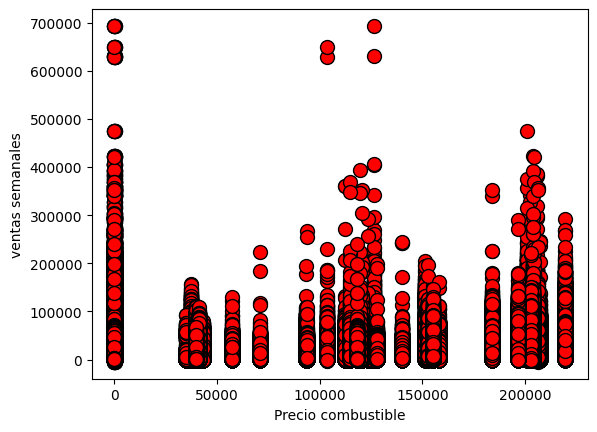

In [58]:
plotData(X, y)

In [14]:
X = np.concatenate([X, X * X], axis=1)

# Interpretación del gráfico
El gráfico sugiere que, aunque hay algunas variaciones en las ventas semanales con respecto al precio del combustible, no hay una tendencia simple o directa visible. Otros factores probablemente juegan un papel importante en las ventas semanales

In [15]:
print(X)

[[1.00000000e+00 0.00000000e+00 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 4.45616724e+04]
 [1.00000000e+00 0.00000000e+00 2.60000000e+01 ... 0.00000000e+00
  0.00000000e+00 4.45616724e+04]
 [1.00000000e+00 0.00000000e+00 1.70000000e+01 ... 0.00000000e+00
  0.00000000e+00 4.45616724e+04]
 ...
 [4.50000000e+01 0.00000000e+00 3.20000000e+01 ... 3.37328640e+03
  1.00000000e+04 3.69827126e+04]
 [4.50000000e+01 0.00000000e+00 8.30000000e+01 ... 3.37328640e+03
  1.00000000e+04 3.69827126e+04]
 [4.50000000e+01 0.00000000e+00 9.80000000e+01 ... 3.37328640e+03
  1.00000000e+04 3.69827126e+04]]


# Normalizamos los datos
Normalizar las características del dataset para que cada una tenga una media de 0 y una desviación estándar de 1. Esto es útil para algoritmos de aprendizaje automático que son sensibles a la escala de las variables, como el descenso de gradiente.

In [16]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [17]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

#print(X)
#print('Media calculada:', mu)
#print('Desviación estandar calculada:', sigma)
#print(X_norm)

Despues de `featureNormalize` la funcion es provada, se añade el temino de interseccion a `X_norm`:

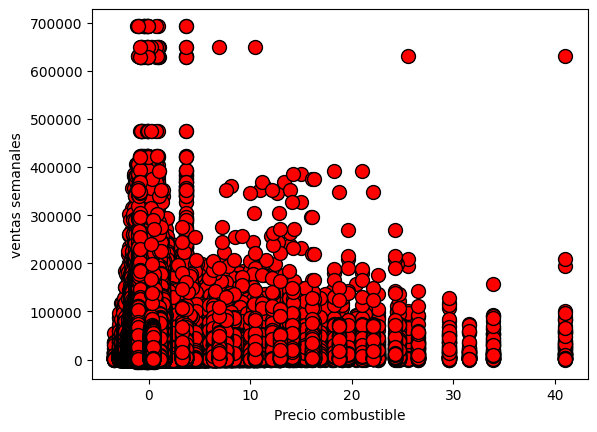

In [59]:
plotData(X_norm, y)

# Interpretación del gráfico
El gráfico sugiere que las ventas semanales no tienen una relación fuerte o lineal con el precio del combustible en este conjunto de datos.

In [19]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
#X_norm = np.concatenate([X_norm, X_norm * X_norm], axis=1)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [20]:
print(X)

[[ 1.         -1.65819926 -0.27510614 ... -0.08275202 -0.06304972
   1.01217575]
 [ 1.         -1.65819926 -0.27510614 ... -0.08275202 -0.06304972
   1.01217575]
 [ 1.         -1.65819926 -0.27510614 ... -0.08275202 -0.06304972
   1.01217575]
 ...
 [ 1.          1.78325781 -0.27510614 ... -0.08274154 -0.06302924
   0.45297092]
 [ 1.          1.78325781 -0.27510614 ... -0.08274154 -0.06302924
   0.45297092]
 [ 1.          1.78325781 -0.27510614 ... -0.08274154 -0.06302924
   0.45297092]]


<a id="section5"></a>
### 2.2 Descenso por el gradiente

En el ejemplo anterior se implemento el descenso por el gradiente para un problema de regresion univariable. La unica diferencia es que ahora existe una caracteristica adicional en la matriz $X$. La función de hipótesis y la regla de actualización del descenso del gradiente por lotes permanecen sin cambios.

La implementacion de las funciones `computeCostMulti` y `gradientDescentMulti` son similares a la funcion de costo y función de descenso por el gradiente de la regresión lineal multiple es similar al de la regresion lineal multivariable. Es importante garantizar que el codigo soporte cualquier numero de caracteristicas y esten bien vectorizadas.

Se puede utilizar `shape`, propiedad de los arrays `numpy`, para identificar cuantas caracteristicas estan consideradas en el dataset.

<div class="alert alert-block alert-warning">
**Nota de implementación:** En el caso de multivariables, la función de costo puede se escrita considerando la forma vectorizada de la siguiente manera:

$$ J(\theta) = \frac{1}{2m}(X\theta - \vec{y})^T(X\theta - \vec{y}) $$

donde:

$$ X = \begin{pmatrix}
- (x^{(1)})^T - \\
- (x^{(2)})^T - \\
\vdots \\
- (x^{(m)})^T - \\ \\
\end{pmatrix} \qquad \mathbf{y} = \begin{bmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)} \\\end{bmatrix}$$

La version vectorizada es eficiente cuando se trabaja con herramientas de calculo numericos computacional como `numpy`.
</div>

<a id="computeCostMulti"></a>

# Implementamos el algoritmo para la computar el costo

In [21]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


# Implementamos el algoritmo para la gradiante descendiente

In [22]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

#### 3.2.1 Seleccionando coheficientes de aprendizaje
Este código entrena un modelo de regresión lineal multivariable usando descenso por gradiente, luego realiza una predicción para un conjunto específico de características normalizadas, y finalmente, muestra el resultado de la predicción, que representa las ventas semanales para esas características.


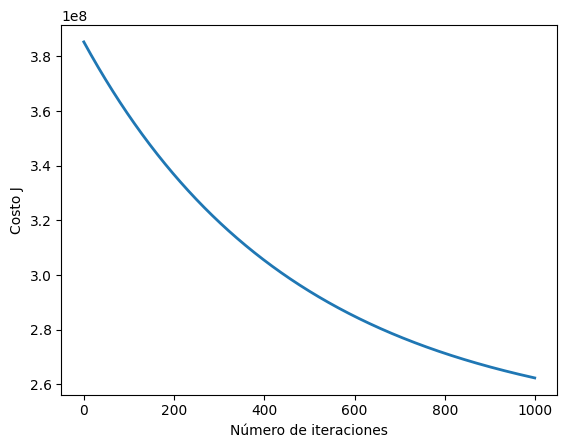

Theta calculado por el descenso por el gradiente: [10105.02262938  -898.20882704    39.84735309  1067.17457285
    57.6769948    -68.58747195   562.91535548   150.61485113
   370.44737212  -302.12540121  -924.34670193    39.84735309
  2559.74363092   -32.00604522   -81.32213218   135.41380587
   138.6937524    346.07396635  -322.02844666]
La predicción de ventas semanales para los datos proporcionados es: $11791


In [30]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 1000

# Inicializa theta con el tamaño correcto
theta = np.zeros(X.shape[1])

# Realiza el descenso por el gradiente
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Graficar la convergencia del costo
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Número de iteraciones')
plt.ylabel('Costo J')
plt.show()

# Muestra los resultados del descenso por el gradiente
print(f'Theta calculado por el descenso por el gradiente: {theta}')

# Predecir "Weekly_Sales" para una tienda en particular (ejemplo)
X_array = [1, 10, 1, 45, 5, 3.5, 1, 2, 150, 4, 3, 2, 1, 3, 5, 0, 1, 2, 0]  # Asegúrate que este vector tenga 19 valores
X_array[1:] = (X_array[1:] - mu) / sigma
price = np.dot(X_array, theta)

print(f'La predicción de ventas semanales para los datos proporcionados es: ${price:.0f}')


# Interpretación de la predicción
El modelo está funcionando correctamente y ha aprendido una relación entre las características del dataset y las ventas semanales. Aunque el costo sigue disminuyendo, parece estar estabilizándose, lo que indica que el modelo está convergiendo a una solución óptima. La predicción realizada es el resultado de aplicar este modelo a un conjunto específico de características de una tienda, lo que proporciona una estimación de las ventas semanales en función de esas características



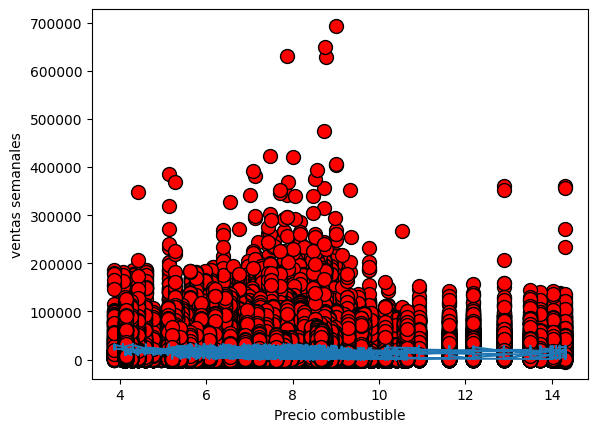

In [71]:
plotData(X[:, 6], y)
pyplot.plot(X[:, 6], np.dot(X, theta), '-')

# Interpretación del gráfico
El modelo de regresión lineal ajustado predice un cambio muy pequeño en las ventas semanales en función del precio del combustible, lo que podría indicar una relación débil


In [41]:
# Asumiendo que ya tienes mu y sigma calculados para las 18 características
X_array = [1, 10, 1, 45, 5, 3.5, 1, 2, 150, 4, 3, 2, 1, 3, 5, 0, 1, 2, 0]  # Ejemplo de datos con 19 elementos

# Normalizar las características en X_array (excepto el primer elemento que es 1)
X_array[1:] = (X_array[1:] - mu) / sigma

In [42]:
price = np.dot(X_array, theta)

print(f'La predicción de ventas semanales para los datos proporcionados es: ${price:.0f}')

La predicción de ventas semanales para los datos proporcionados es: $11791


# Interpretación de la predicción
La predicción indica que, para las características dadas (que podrían representar una tienda específica, en un momento específico y con condiciones específicas de temperatura, precios, etc.), el modelo espera que las ventas semanales sean aproximadamente $11,791. Este valor es una estimación basada en el modelo de regresión lineal y debe interpretarse en el contexto del modelo y los datos utilizados para entrenarlo. Es posible que en un contexto real este valor no sea exacto, pero proporciona una aproximación basada en las características dadas.

<a id="section7"></a>
### 2.3 Ecuacion de la Normal

Una manera de calcular rapidamente el modelo de una regresion lineal es:

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

Utilizando esta formula no requiere que se escale ninguna caracteristica, y se obtendra una solucion exacta con un solo calculo: no hay “bucles de convergencia” como en el descenso por el gradiente.

Primero se recargan los datos para garantizar que las variables no esten modificadas. Recordar que no es necesario escalar las caracteristicas, se debe agregar la columna de unos a la matriz $X$ para tener el termino de intersección($\theta_0$).

In [48]:
# Cargar los datos
data = pd.read_csv('/content/gdrive/MyDrive/Sistemas/Universidad - Sistemas/7mo semestre/IA/Laboratorio/Laboratorio2/walmart_cleaned.csv', delimiter=";")

# Verificar las columnas disponibles
print(data.columns)


Index([',Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size'], dtype='object')


In [53]:
import pandas as pd
import numpy as np

# Cargar los datos
data = pd.read_csv('/content/gdrive/MyDrive/Sistemas/Universidad - Sistemas/7mo semestre/IA/Laboratorio/Laboratorio2/walmart_cleaned.csv', delimiter=",")

# Seleccionar las características (X) y la variable objetivo (y)
X = data[['Store', 'Dept', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']]
y = data['Weekly_Sales']

# Verificar las dimensiones de X y y
m = y.size
print(m)

# Añadir la columna de unos para el término de intersección (theta_0)
X = np.concatenate([np.ones((m, 1)), X], axis=1)

# Aplicar la ecuación de la Normal
theta = np.linalg.inv(X.T @ X) @ X.T @ y

# Mostrar los valores de theta calculados
print('Los valores de theta calculados son:', theta)


421570
Los valores de theta calculados son: [ 6.11570075e+03 -8.79699937e+01  1.11494022e+02  2.17147971e+01
 -3.70879577e+02 -2.21170624e+01 -1.71356053e+02  8.75900054e-02]


# Implementación del algoritmo de la ecuación de la Normal

In [54]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [56]:
# Calcular los parámetros con la ecuación de la normal
theta = normalEqn(X, y)

# Mostrar los resultados obtenidos a partir de la aplicación de la ecuación de la normal
print(f'Theta calculado a partir de la ecuación de la normal: {theta}')

# Estimar las ventas semanales para un ejemplo particular
# Asegúrate de que X_array tenga 8 elementos, incluido el término de sesgo (intercepto)
X_array = np.array([1, 10, 45, 5, 3.5, 1, 2, 150])

price = np.dot(X_array, theta)

print(f'La predicción de ventas semanales para los datos proporcionados es: ${price:.0f}')


Theta calculado a partir de la ecuación de la normal: [ 6.11570075e+03 -8.79699937e+01  1.11494022e+02  2.17147971e+01
 -3.70879577e+02 -2.21170624e+01 -1.71356053e+02  8.75900054e-02]
La predicción de ventas semanales para los datos proporcionados es: $8712


# Interpretación de la predicción
Este valor de $8712 es la predicción del modelo para las ventas semanales, dada una tienda con las siguientes características:

Store = 10
Dept = 45
Temperature = 5
Fuel_Price = 3.5
CPI = 2
Unemployment = 1
Size = 150
Conclusión:

Según el modelo, una tienda con las características anteriores tendría unas ventas semanales estimadas de aproximadamente $8712. Este valor es el resultado de combinar los efectos de todas las características utilizando los coeficientes theta calculados.